# Delta network

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/frannerin/AlloViz/HEAD?labpath=notebooks%2Fdelta.ipynb)

A delta-network can be calculated by subtracting the edge weights of two networks that have “comparable” nodes (e.g., two networks of the same protein in different conformations, such as activation states). The delta-network reduces the noise in the data and provides a better way of comparing two systems, in opposition to a direct comparison of the networks’ edge weights, and thus is able to capture more subtle differences.

In [1]:
import AlloViz

## Systems setup

We are going to use the structure and simulations of the class A GPCR Beta-2 adrenergic receptor (B2AR) in the active form bound to epinephrine (full agonist, GPCRmd ID [117](https://submission.gpcrmd.org/view/117/)) and in the inactive form bound to carazolol (inverse agonist, [160](https://submission.gpcrmd.org/view/160/)).

The GPCR argument can be a True boolean, in which case the structure will be processed as a GPCR and the corresponding generic numbering will be retrieved from GPCRdb. It can also be the ID of a GPCRmd database dynamics entry, to automatically retrieve the files from the database and process them.

In [2]:
activeB2AR = AlloViz.Protein(pdb="data/117/protein.pdb",
                             trajs=["data/117/traj_1.xtc", "data/117/traj_2.xtc"],
                             path="data/117",
                             GPCR=True,
                             name="Active B2AR")
inactiveB2AR = AlloViz.Protein(pdb="data/160/protein.pdb",
                             trajs=["data/160/traj_1.xtc", "data/160/traj_1.xtc"],
                             path="data/160",
                             GPCR=True,
                             name="Inactive B2AR")

/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:753: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/lib/util.py:664: RuntimeWarning: Constructed NamedStream from a NamedStream
  warnings.warn("Constructed NamedStream from a NamedStream",


## Network calculation

From all the available [options](https://alloviz.readthedocs.io/en/latest/table.html), we are going to use correlationplus_CA_Pear as network construction method, which measures measures the correlation of the residues' alpha-carbons positions along the trajectory using the Pearson's correlation coefficient. We are going to pass 2 as the number of cores so that the network calculations of the two trajectory replicas run in parallel.

In [3]:
activeB2AR.calculate(pkgs="correlationplus_CA_Pear", cores=2)
inactiveB2AR.calculate(pkgs="correlationplus_CA_Pear", cores=2)

correlationplus_CA_Pear


/home/frann/miniconda3/envs/alloviz/lib/python3.9/pickle.py:578: UserWarning: Reader has no dt information, set to 1.0 ps
  rv = reduce(self.proto)


adding raw data of correlationplus_CA_Pear for data/117/protein.pdb:  ['data/117/data/correlationplus_CA_Pear/raw/1.pq', 'data/117/data/correlationplus_CA_Pear/raw/2.pq']
correlationplus_CA_Pear


/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/frann/miniconda3/envs/alloviz/lib/python3.9/pickle.py:578: UserWarning: Reader has no dt information, set to 1.0 ps
  rv = reduce(self.proto)
/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


adding raw data of correlationplus_CA_Pear for data/160/protein.pdb:  ['data/160/data/correlationplus_CA_Pear/raw/1.pq', 'data/160/data/correlationplus_CA_Pear/raw/2.pq']


## Network filtering

From all the available [filters](https://alloviz.readthedocs.io/en/latest/api/AlloViz.AlloViz.Filtering.html), we are going to choose `"No_Sequence_Neighbors"`, which filters out residue pairs that are too close to each other in the protein sequence (less than 5 positions away in the sequence).

In [4]:
activeB2AR.filter(filterings="No_Sequence_Neighbors")
inactiveB2AR.filter(filterings="No_Sequence_Neighbors")

## Network analysis

And finally, we are going to analyze the edges using the betweenness centrality metric ("btw").

In [5]:
activeB2AR.analyze(elements="edges", metrics="btw")
inactiveB2AR.analyze(elements="edges", metrics="btw")

adding analyzed edges <AlloViz.Wrappers.correlationplus_w.correlationplus_CA_Pear object at 0x7f596063f100> No_Sequence_Neighbors data of for data/117/protein.pdb
adding analyzed edges <AlloViz.Wrappers.correlationplus_w.correlationplus_CA_Pear object at 0x7f59602b10a0> No_Sequence_Neighbors data of for data/160/protein.pdb


## Delta-network construction

The [Delta](https://alloviz.readthedocs.io/en/latest/api/AlloViz.Delta.html) constructor performs the delta-network calculations automatically when supplied with two `Protein` objects.

In [6]:
delta = AlloViz.Delta(activeB2AR, inactiveB2AR)

To find the corresponding nodes (and thus edges) to be subtracted between the two structures, open-source PyMOL is used to retrieve a sequence alignment from a structural superposition:

In [7]:
print(delta._aln)

Alignment with 2 rows and 305 columns
QERDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTN...LCL prot1
QERDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTN...LR- prot2


/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


NGLWidget()

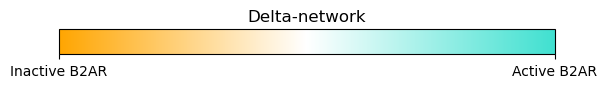

In [8]:
delta.view(pkg="correlationplus_CA_Pear", metric="btw", filtering="No_Sequence_Neighbors", element="edges")

The global structure and communication of the two compared systems is expected to be alike (except for just a few conformational changes due to the perturbation), and thus most residue pair interactions will have similar weights. The calculation of the delta-network reduces this noise and helps to highlight the subtle differences between the two networks.

Each of the network’s edge weights of one structure are subtracted from the corresponding edge weights of the first one. This connotes that, the more positive a value is in the resulting delta-network, the more important the edge is in the first structure (i.e., the edge has a significant weight in the first structure’s network and, if its magnitude is preserved in the delta-network, it means that it was not as significant in the other structure’s network and the subtraction did not quite affect it). Similarly, the more negative a value is in the delta-network, the more important the edge is in the other structure. 